In [235]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
%matplotlib inline

In [236]:
det_params_names = ['min_edge_thres', 'max_edge_thres', 'retr_type', 'retr_approx', 'min_poly', 'max_area']
DetectorParams = namedtuple('DetectorParams', det_params_names)

class ControursDetector:
    def __init__(self, image, det_params):
        self.image = image
        self.det_params = det_params        
        self.edged_image = None
        self.contours_image = None
        
    def create_edged_image(self):
        min_thres, max_thres = self.det_params.min_edge_thres, self.det_params.max_edge_thres
        self.edged_image = cv2.Canny(self.image, min_thres, max_thres)
        
    def is_contour_valid(self, contour):
        if cv2.contourArea(contour) >= self.det_params.max_area:
            return False
        poly_approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        return (len(poly_approx) > self.det_params.min_poly)
        
    def get_contours(self):
        if self.edged_image is None:
            self.create_edged_image()
        retr_type, retr_approx = self.det_params.retr_type, self.det_params.retr_approx
        out_image, contours, hierarchy = cv2.findContours(self.edged_image, retr_type, retr_approx)
        return filter(self.is_contour_valid, contours)
    
    def create_contours_image(self):
        contours = self.get_contours()
        self.contours_image = self.image.copy()
        for cnt in contours:
            cv2.drawContours(self.contours_image, [cnt], 0, (0,255,255), -1)    
    
    def plot_contours_image(self):
        if self.contours_image is None:
            self.create_contours_image()
        plt.figure(figsize=(14, 9))
        plt.imshow(self.contours_image)
        plt.show()

In [237]:
def test_params(filepath_list, det_params):
    for filepath in filepath_list:
        image = cv2.imread(filepath, 1)
        detector = ControursDetector(image, det_params)
        detector.plot_contours_image()
        print(len(detector.get_contours()))

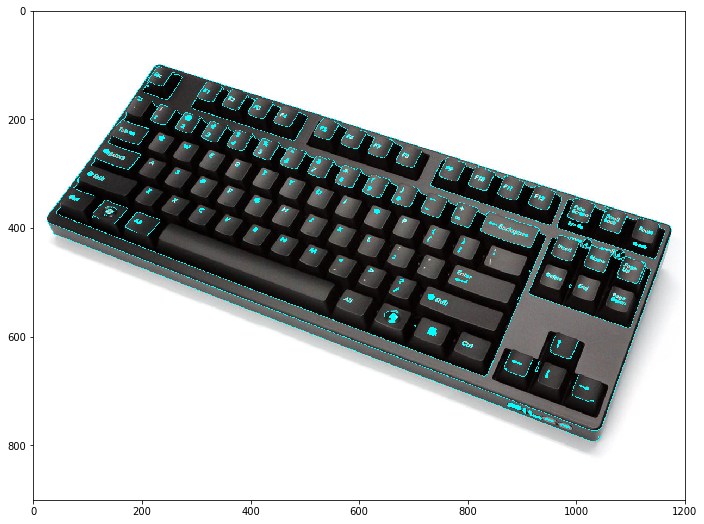

293


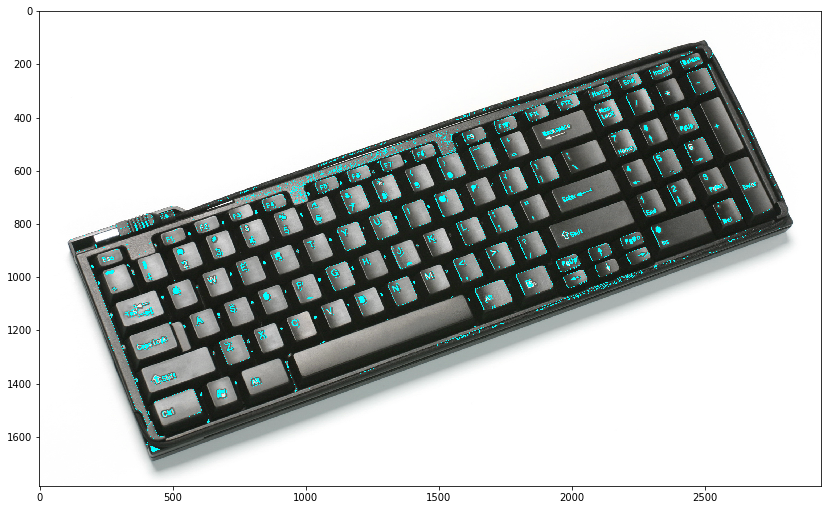

1212


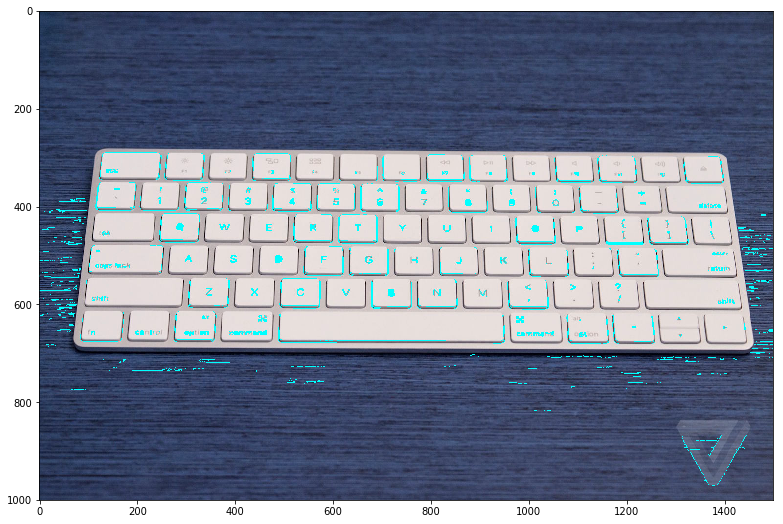

403


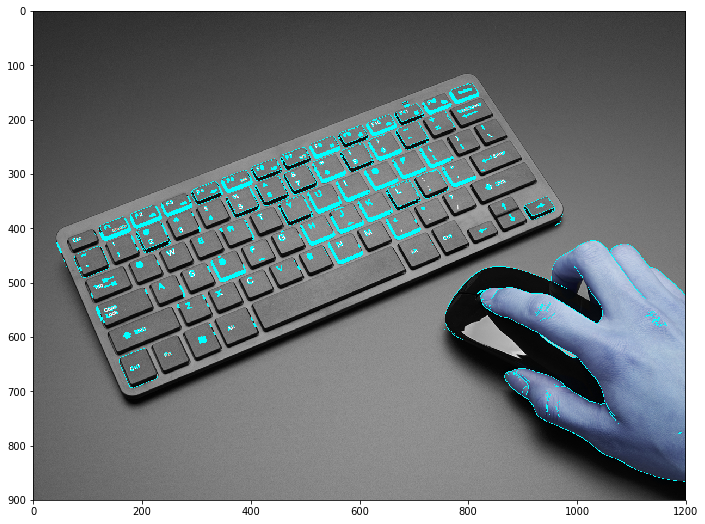

378


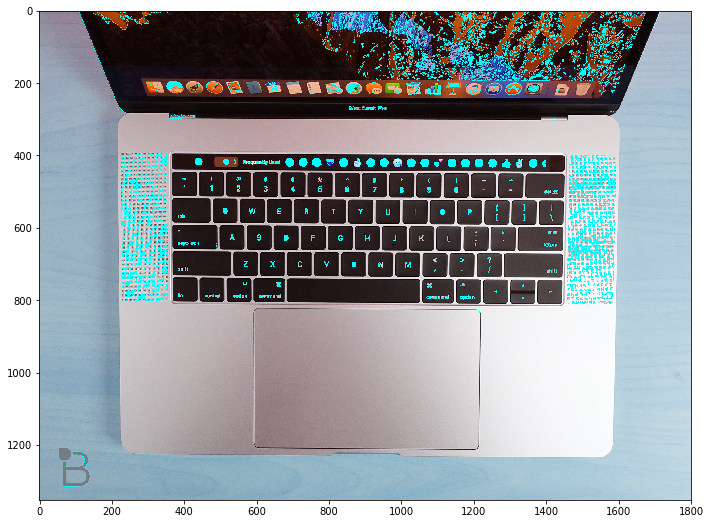

1959


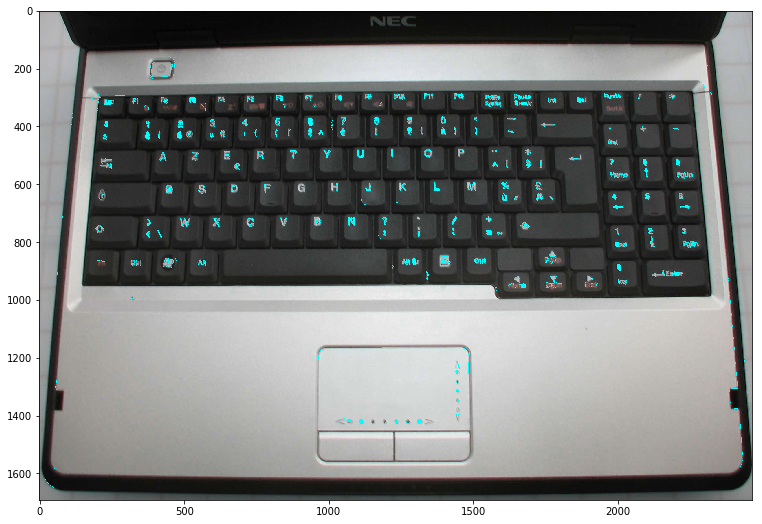

520


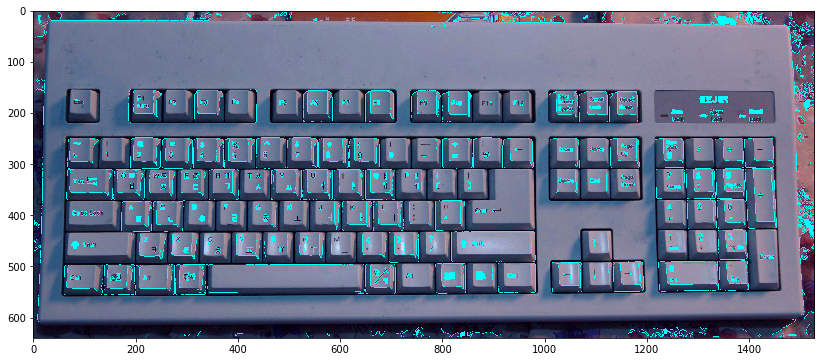

651


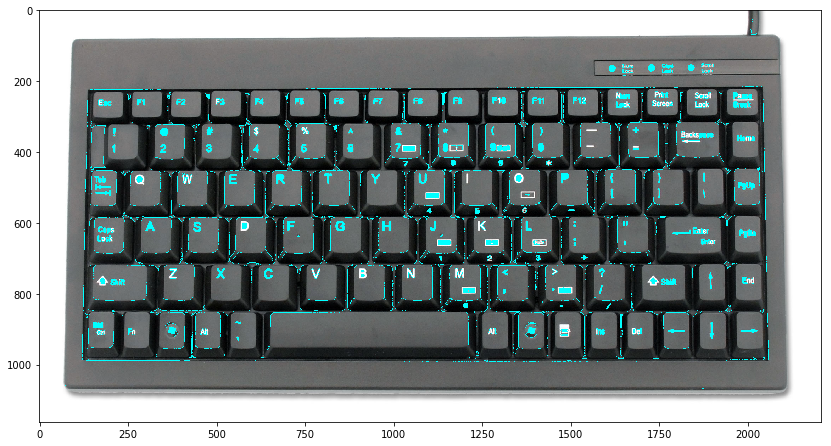

657


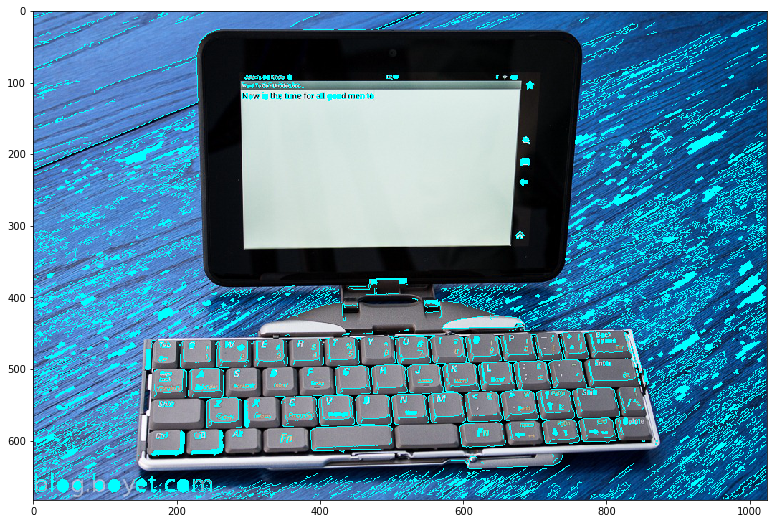

1539


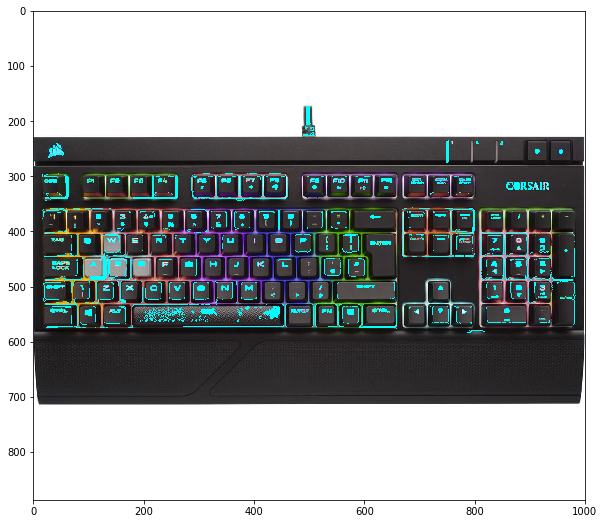

423


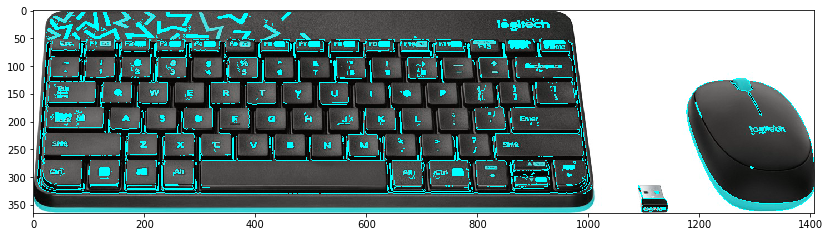

463


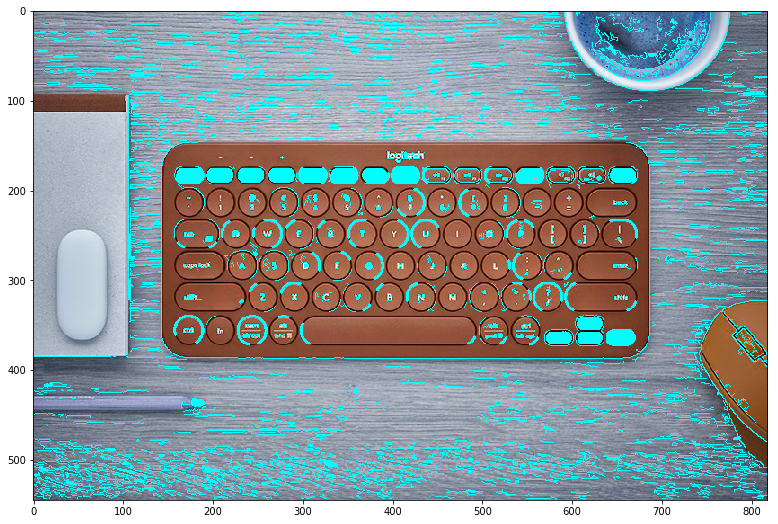

997


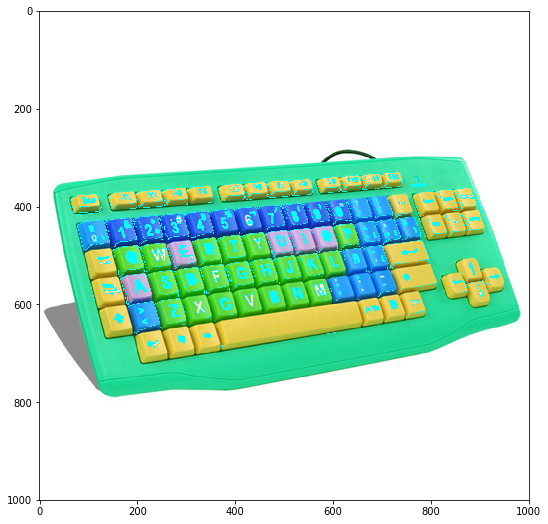

385


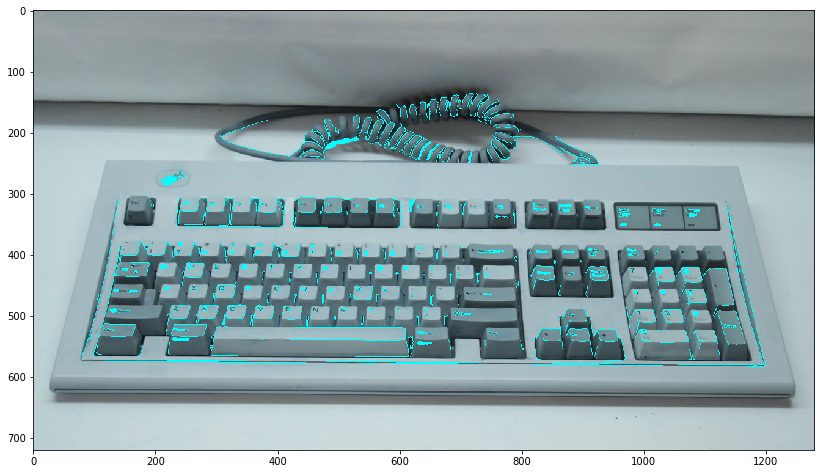

329


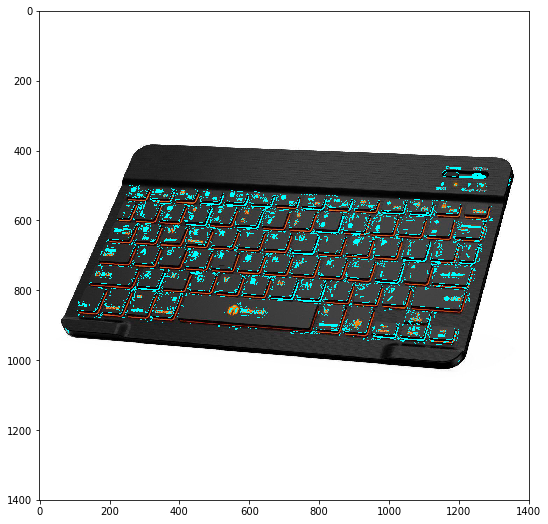

1018


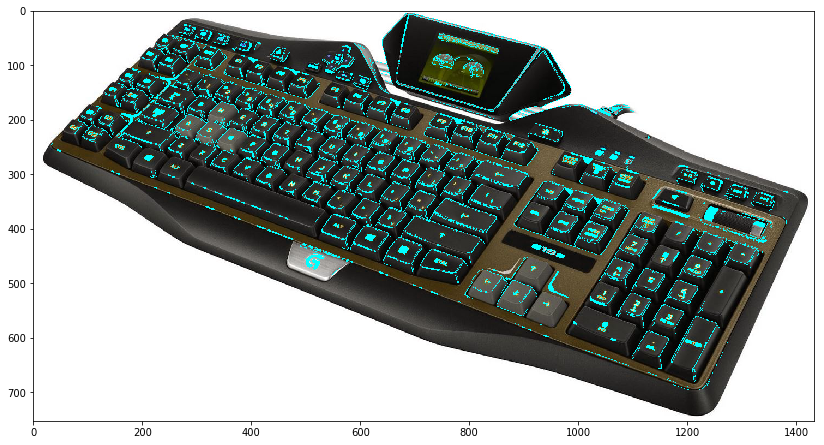

847


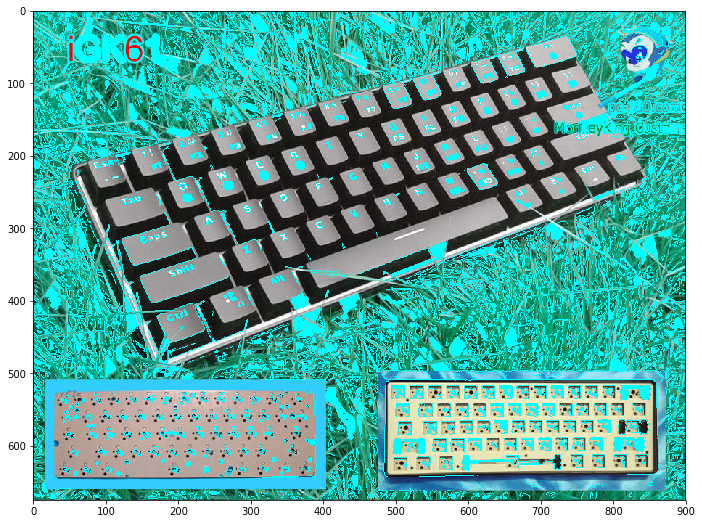

2509


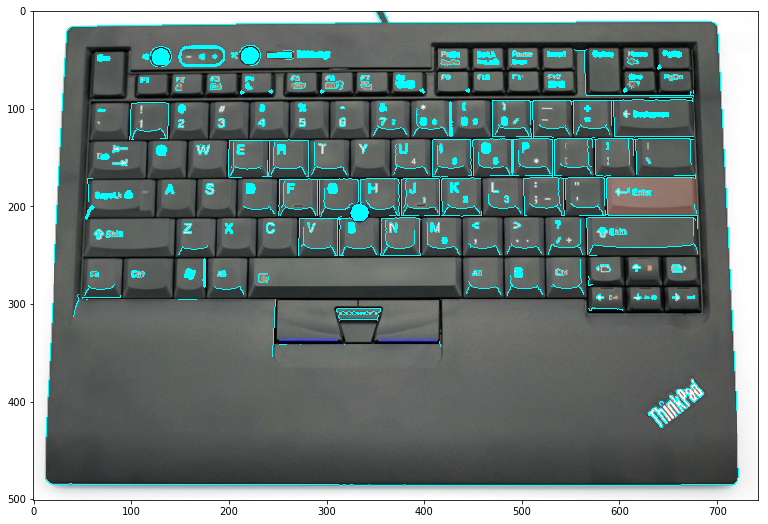

288


In [241]:
filepath_list = map(lambda x: "keyboard{0}.jpg".format(x), range(1, 19))
det_params = DetectorParams(75, 200, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 8, 500)
test_params(filepath_list, det_params)